In [1]:
#Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
#Load the dataset
data_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df = pd.read_csv(data_url)

#Print Rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
#Print summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
#Drop rows with missing values and select some features
df = df.dropna()
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
target = 'mpg'

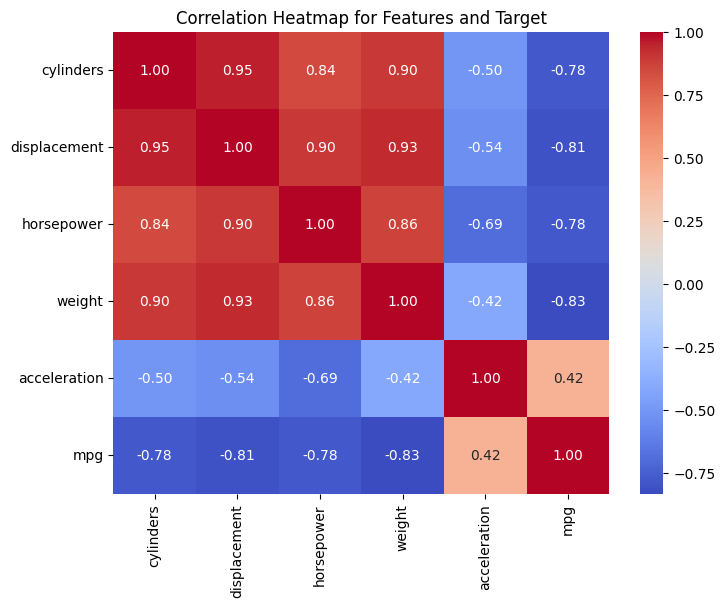

In [5]:
#Calculate correlation matrix
correlation_matrix = df[features + [target]].corr()

#plot heatmap of important features
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Features and Target')
plt.show()

In [6]:
#select features from correlation matrix and use mpg as target variable
X = df[['cylinders', 'displacement', 'horsepower', 'weight']].values
y = df['mpg'].values

In [7]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Create and train the model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [9]:
#Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 17.89


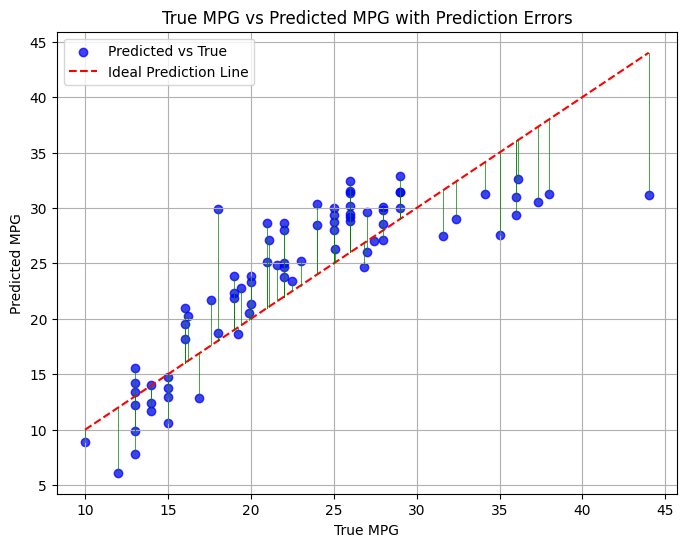

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [10]:
#Plot the true and predicted values
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='blue', alpha=0.75, label='Predicted vs True')

plt.plot((min(y_test), max(y_test)), (min(y_test), max(y_test)), color='red', linestyle='--', label='Ideal Prediction Line')

#Calculate and plot prediction errors 
for (true_value, pred_value) in zip(y_test, y_pred):
    plt.plot([true_value, true_value], [true_value, pred_value], color='green', linestyle='-', linewidth=0.5)
    
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')
plt.title('True MPG vs Predicted MPG with Prediction Errors')
plt.legend()
plt.grid(True)
plt.show()
df.info()